In [1]:
import sys
sys.path.append('H:/code/tools/informationtransfermapping-master1/informationtransfermapping-master/TheoreticalResults/')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import scipy.io as sio
import statsmodels.api as sm

## Import custom modules
# Primary module with most model functions
import model
# Module for FC regression
import multregressionconnectivity as mreg

In [8]:
# Define transfer function
phi = lambda x: np.tanh(x)
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
 
def plot_tanh():
    x=np.arange(-10,10,0.1)
    y=tanh(x)
    plt.plot(x,y)
    plt.show()

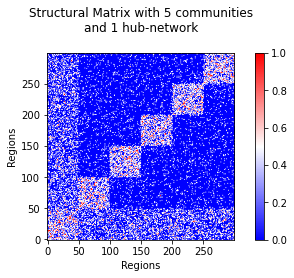

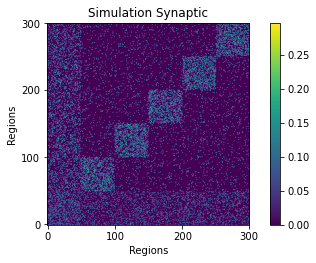

In [6]:
## Set up simulation parameters
nblocks = 20
ntasks = 4
Tmax = 10000
Tmaxrest = 60000
dt = 1.0
tau = 1.0
g = 1.0
s = 1.0
TRLength = 100

#### Set up subject network matrix ####
# Parameters for subject's networks
ncommunities = 6
innetwork_dsity = .35
outnetwork_dsity = .05
hubnetwork_dsity = .20

nodespercommunity = 50
totalnodes = nodespercommunity*ncommunities

# Construct structural matrix
W = model.generateStructuralNetwork(ncommunities=ncommunities,
                                    innetwork_dsity=innetwork_dsity,
                                    outnetwork_dsity=outnetwork_dsity,
                                    hubnetwork_dsity=hubnetwork_dsity,
                                    nodespercommunity=nodespercommunity,
                                    showplot=True)
# Construct synaptic matrix
G = model.generateSynapticNetwork(W, showplot=True)
plt.xticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
plt.yticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
ax = plt.gca();   #获得当前轴
ax.set_xticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
ax.set_yticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
plt.title('Simulation Synaptic')
plt.savefig('Act_structSCMatrix.pdf',dpi=600,transparent=True, bbox_inches='tight')
dataNew = 'H:/Preprocessing/HCP360/simulation/time3/SC1.mat'
sio.savemat(dataNew,{'W':W} )

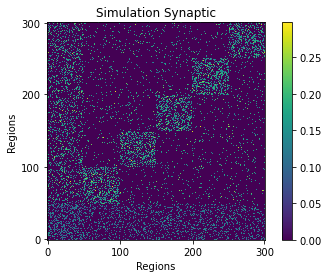

In [85]:
#### Set up subject networks ####
# Parameters for subject's networks
ncommunities = 6
innetwork_dsity = .35
outnetwork_dsity = .05
hubnetwork_dsity = .20

nodespercommunity = 50
totalnodes = nodespercommunity*ncommunities

##########
# Construct structural matrix
W = model.generateStructuralNetwork(ncommunities=ncommunities, innetwork_dsity=innetwork_dsity,
                                    outnetwork_dsity=outnetwork_dsity, hubnetwork_dsity=hubnetwork_dsity,
                                    nodespercommunity=nodespercommunity, showplot=False)
# Construct synaptic matrix
G = model.generateSynapticNetwork(W, showplot=False)

# Define community affiliation vector
Ci = np.repeat(np.arange(ncommunities),nodespercommunity)

# Plot figure
plt.figure()
# norm = MidpointNormalize(midpoint=0)
plt.imshow(G,origin='lower',interpolation='none')
plt.xlabel('Regions')
plt.ylabel('Regions')
plt.title('Synaptic Weight Matrix', y=1.04, fontsize=18)
plt.colorbar()
plt.xticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
plt.yticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
ax = plt.gca();   #获得当前轴
ax.set_xticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
ax.set_yticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
plt.title('Simulation Synaptic')
plt.savefig('Act_structMEDMatrix2.pdf',dpi=600,transparent=True, bbox_inches='tight')
dataNew = 'H:/Preprocessing/HCP360/simulation/time3/SC30.mat'
sio.savemat(dataNew,{'G':G} )

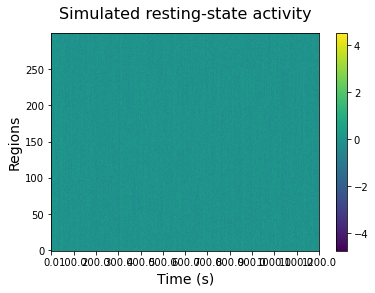

In [86]:
nblocks = 20
ntasks = 4
Tmax = 10000
Tmaxrest = 120100
dt = 1.0
tau = 1.0
g = 1.0
s = 1.0
TRLength = 100
restdata = model.networkModel(G, 
                              Tmax=Tmaxrest,
                              dt=dt,
                              g=g,
                              s=s,
                              tau=tau,
                              I=None,
                              noise=1)

plt.figure()
plt.imshow(restdata, aspect='auto',origin='lower')
plt.title('Simulated resting-state activity', y=1.04, fontsize=16)
plt.ylabel('Regions',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.xticks(np.arange(0,Tmaxrest+1,10000),np.arange(0,Tmaxrest+1,10000)/100)
plt.colorbar()

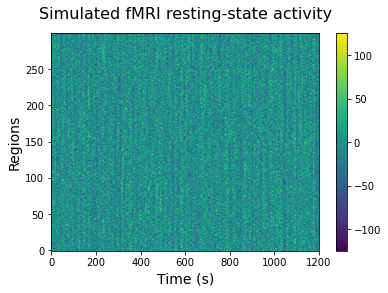

In [87]:
restfmri = model.convolveTimeseries(restdata,
                                    samplingrate=dt,
                                    TRLength=TRLength)
dataNew = 'H:/Preprocessing/HCP360/simulation/time3/timeseries30.mat'
sio.savemat(dataNew,{'restfmri':restfmri} )
plt.figure()
plt.imshow(restfmri, aspect='auto',origin='lower')
plt.title('Simulated fMRI resting-state activity', y=1.04, fontsize=16)
plt.ylabel('Regions',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.colorbar()

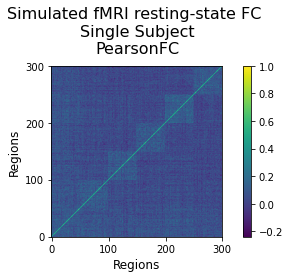

In [88]:
fcmat = np.corrcoef(restfmri)
# 0 out the diagonal
#np.fill_diagonal(fcmat,0)
dataNew = 'H:/Preprocessing/HCP360/simulation/time3/FC30.mat'
sio.savemat(dataNew,{'fcmat':fcmat} )
plt.figure()
plt.imshow(fcmat, origin='lower')
plt.colorbar()
plt.title('Simulated fMRI resting-state FC \nSingle Subject\nPearsonFC', y=1.04, fontsize=16)
plt.xlabel('Regions',fontsize=12)
plt.ylabel('Regions', fontsize=12)
plt.tight_layout()
plt.xticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
plt.yticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
ax = plt.gca();   #获得当前轴
ax.set_xticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
ax.set_yticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
plt.savefig('Act_structFCMatrix.pdf',dpi=600,transparent=True, bbox_inches='tight')

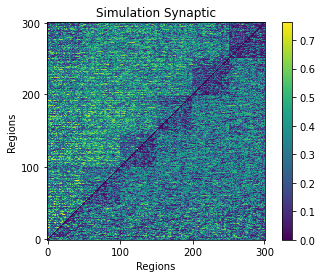

In [63]:
datastorage='H:/Preprocessing/HCP360/simulation/time3/result/inferTrans.mat'
S= sio.loadmat(datastorage)
#simseries=S['simHRFseries']
B=S['inferT']
# Plot figure
plt.figure()
# norm = MidpointNormalize(midpoint=0)
plt.imshow(B,origin='lower',interpolation='none')
plt.xlabel('Regions')
plt.ylabel('Regions')
plt.title('Synaptic Mediation Matrix', y=1.04, fontsize=18)
plt.colorbar()
plt.xticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
plt.yticks(np.append(np.arange(0,300,100), np.array(300-1))) #设置y轴刻度
ax = plt.gca();   #获得当前轴
ax.set_xticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
ax.set_yticklabels(np.append(np.arange(0,300,100), np.array(300)))  #控制坐标轴的显示
plt.title('Simulation Synaptic')
plt.savefig('Act_structMEDMatrixnew.pdf',dpi=600,transparent=True, bbox_inches='tight')